### <font> https://www.python-course.eu/k_nearest_neighbor_classifier.php </font>
###  <font color=red>Loading the data </font>

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn import datasets

In [2]:
iris = datasets.load_iris()           # It is better to read it in Pandas
X = iris.data                         # X = iris_data
y = iris.target                       # y = iris_labels
print(X[0], X[79], X[100])
print(y[0], y[79], y[100])

[5.1 3.5 1.4 0.2] [5.7 2.6 3.5 1. ] [6.3 3.3 6.  2.5]
0 1 2


In [3]:
print(X.shape)

(150, 4)


In [4]:
print(y.shape)

(150,)


### <font color=red> Splitting data randomly using permutation from np.random </font>

In [5]:
np.random.seed(42)
indices = np.random.permutation(len(X))
n_training_samples = 12         # 12 training samples out of 150 total samples
X_train = X[indices[:-n_training_samples]]
y_train = y[indices[:-n_training_samples]]
X_test = X[indices[-n_training_samples:]]
y_test = y[indices[-n_training_samples:]]
print(X_train[:4], y_train[:4])
print(X_test[:4], y_test[:4])

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]] [1 0 2 1]
[[5.7 2.8 4.1 1.3]
 [6.5 3.  5.5 1.8]
 [6.3 2.3 4.4 1.3]
 [6.4 2.9 4.3 1.3]] [1 2 1 1]


#### <font color=magenta> iris data consists of four values per incidence. That means the data should be reduced three values.  That is achieved by summing up the third and fourth value. This way, the data are capable of depicting in 3-dimensional space: </font>

<IPython.core.display.Javascript object>


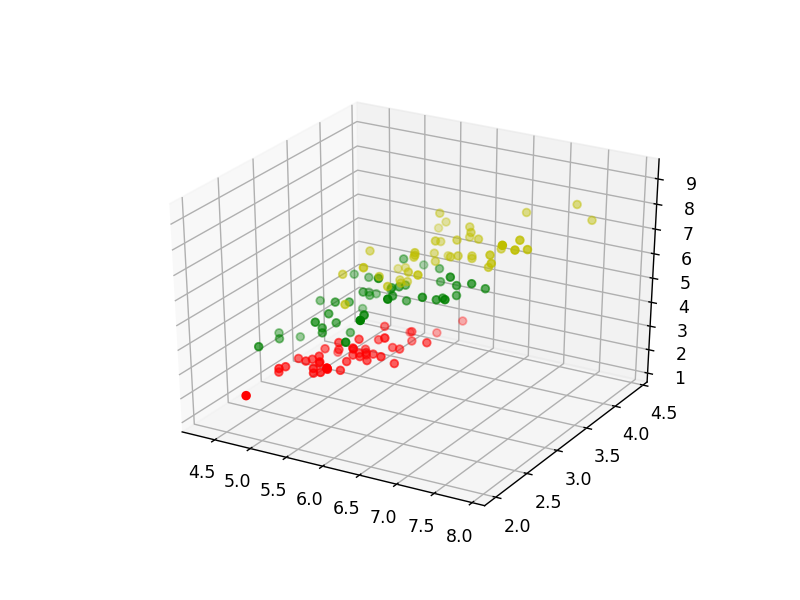

In [11]:
colors = ('r', 'b')
XX = []
for iclass in range(3):
    XX.append([[], [], []])
    for i in range(len(X_train)):       # len(X_train)=138     len(X_test)=12
        if y_train[i] == iclass:
            XX[iclass][0].append(X_train[i][0])
            XX[iclass][1].append(X_train[i][1])
            XX[iclass][2].append(sum(X_train[i][2:]))
colors = ('r', 'g', 'y')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
       ax.scatter(XX[iclass][0], XX[iclass][1], XX[iclass][2], c=colors[iclass])
plt.show()

In [ ]:
def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1)
    instance2 = np.array(instance2)
    return np.linalg.norm(instance1 - instance2)

In [ ]:
print(distance(X[3], X[44]))

#### <font color=red> get_neighbors returns a list with 'k' neighbors, </font>
#### <font color=red> which are closest to the instance 'test_instance'</font>

    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where 
    <font color=red> index </font>    is the index from the training_set,
    <font color=red> dist </font>     is the distance between the test_instance and the 
             instance training_set[index]
    <font color=red> distance  </font> is a reference to a function used to calculate the 
             distances

In [ ]:
def get_neighbors(X_train,y_train,X_test,k,distance=distance):
    distances = []
    for index in range(len(X_train)):
        dist = distance(X_test, X_train[index])
        distances.append((X_train[index], dist, y_train[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

In [ ]:
for i in range(5):
    neighbors = get_neighbors(X_train,y_train,X_test[i],3,distance=distance)
    print(i,X_test[i],y_test[i],neighbors)

###  <font color=red > Vote function  </font>

In [ ]:
from collections import Counter
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

####  <font color=red > Testing the vote function  </font>

In [ ]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data,learnset_labels,testset_data[i],3,distance=distance)
    print("index: ", i, 
          ", result of vote: ", vote(neighbors), 
          ", label: ", testset_labels[i], 
          ", data: ", testset_data[i])

### <font color=red> Using a different value for K </font>

In [ ]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

#### <font color=red> Using a different vote function that returns the class name and probability for this class </font>

In [ ]:
def vote_prob(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    return winner, votes4winner/sum(votes)

In [ ]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              5, 
                              distance=distance)
    print("index: ", i, 
          ", vote_prob: ", vote_prob(neighbors), 
          ", label: ", testset_labels[i], 
          ", data: ", testset_data[i])